# Coca Cola Stock - Live and Updated

## Data Pipeline:

In [3]:
import pandas as pd
stock_history= pd.read_csv(r"C:\Coca-Cola_stock_history.csv", parse_dates=['Date'])
stock_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [5]:
stock_info= pd.read_csv(r"C:\Coca-Cola_stock_info.csv")
stock_info.head()

,Key,Value
0,zip,30313
1,sector,Consumer Defensive
2,fullTimeEmployees,80300
3,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
4,city,Atlanta


In [3]:
# need to install yfinance library:
!pip install yfinance

In [7]:
import yfinance as yf
ticker = yf.Ticker("KO")
live_data = ticker.history(period="60d")  # last 60 days of data
print(live_data[['Open','Close','Volume']].tail())

                                Open      Close    Volume
Date                                                     
2025-12-09 00:00:00-05:00  70.370003  70.089996  13010600
2025-12-10 00:00:00-05:00  70.389999  70.209999  29789400
2025-12-11 00:00:00-05:00  70.550003  69.110001  23124200
2025-12-12 00:00:00-05:00  69.110001  70.519997  18444500
2025-12-15 00:00:00-05:00  70.430000  70.970001  18655400


In [9]:
stock_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15311 non-null  datetime64[ns]
 1   Open          15311 non-null  float64       
 2   High          15311 non-null  float64       
 3   Low           15311 non-null  float64       
 4   Close         15311 non-null  float64       
 5   Volume        15311 non-null  int64         
 6   Dividends     15311 non-null  float64       
 7   Stock Splits  15311 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 957.1 KB


In [11]:
stock_history.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [13]:
stock_history.duplicated().sum()
stock_history = stock_history.drop_duplicates(subset=['Date'])

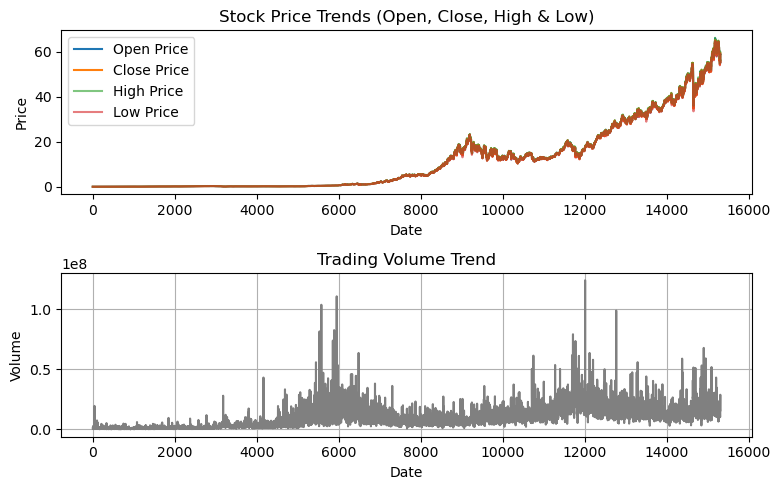

Correlation between Closing Price and Trading Volume: 0.45575024414221044


In [15]:
# Visualizations: Plot price and volume trends to spot patterns:
import matplotlib.pyplot as plt

# Set the overall figure size
plt.figure(figsize=(8, 5))

# PRICE TRENDS (Open, Close, High/Low Range)
plt.subplot(2, 1, 1)
plt.plot(stock_history.index, stock_history['Open'], label='Open Price')
plt.plot(stock_history.index, stock_history['Close'], label='Close Price')
plt.plot(stock_history.index, stock_history['High'], label='High Price', alpha=0.6)
plt.plot(stock_history.index, stock_history['Low'], label='Low Price', alpha=0.6)

plt.title("Stock Price Trends (Open, Close, High & Low)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# VOLUME TREND (Spike Detection)
plt.subplot(2, 1, 2)
plt.plot(stock_history.index, stock_history['Volume'], color='gray')
plt.title("Trading Volume Trend")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)

plt.tight_layout()
plt.show()

# CORRELATION BETWEEN PRICE & VOLUME
correlation = stock_history['Close'].corr(stock_history['Volume'])
print("Correlation between Closing Price and Trading Volume:", correlation)

In [17]:
stock_history[['Open','High','Low','Close','Volume']].describe()

,Open,High,Low,Close,Volume
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08


<Axes: >

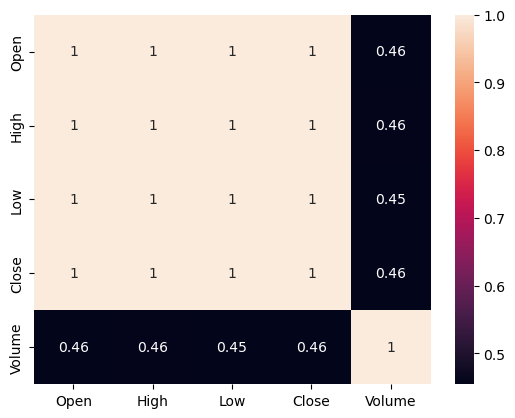

In [19]:
# This heatmap shows how strongly each value moves with the others: all price values (Open, High, Low, Close) move together almost perfectly (corr ≈ 1), 
# while Volume has a moderate relationship with price (corr ≈ 0.45), meaning volume sometimes affects price but not always.
import seaborn as sns
corr = stock_history[['Open','High','Low','Close','Volume']].corr()
sns.heatmap(corr, annot=True)

In [21]:
# Moving Averages
# This code calculates the 20-day and 50-day average closing prices to show smooth trend lines that help identify stock direction and trend reversals more clearly.
stock_history['MA_20'] = stock_history['Close'].rolling(window=20).mean()
stock_history['MA_50'] = stock_history['Close'].rolling(window=50).mean()

In [23]:
# Daily Returns: Compute percent change in close price:
# This code calculates the day-to-day percentage change in closing price, helping you understand daily growth, losses, and stock volatility.
stock_history['Daily_Return'] = stock_history['Close'].pct_change()

In [25]:
# Volatility: Measure the variability of returns, often via rolling standard deviation
# This code measures how much the stock’s daily returns fluctuated over the past 20 days, helping you understand its risk level — higher volatility means bigger price swings.
stock_history['Volatility'] = stock_history['Daily_Return'].rolling(window=20).std()

In [27]:
# EMA_20 is a smoother, more responsive version of the price trend.
# This code creates a 20-day EMA, a smooth trend line that reacts quickly to recent price changes and helps identify short-term momentum in the stock.
stock_history['EMA_20'] = stock_history['Close'].ewm(span=20, adjust=False).mean()

In [29]:
# Baseline: Linear Regression
# Use basic features (open, high, low, volume, and engineered indicators) to predict Close.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = ['Open','High','Low','Volume','MA_20','MA_50','Daily_Return','Volatility']
data = stock_history.dropna()  # drop initial rows where rolling stats are NaN
X = data[features]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.3f}, MAE: {mae_lr:.3f}")

Linear Regression MSE: 0.029, MAE: 0.116


In [31]:
# Main Model: Random Forest
import joblib
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'rf_model.pkl')
print("Random Forest model saved successfully")

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.3f}, MAE: {mae_rf:.3f}")

Random Forest model saved successfully
Random Forest MSE: 328.004, MAE: 14.670


In [33]:
# Advanced: LSTM Neural Network
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize closing prices
prices = data['Close'].values.reshape(-1,1)
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Create 60-day input sequences to predict the next day
X_seq, y_seq = [], []
seq_len = 60
for i in range(seq_len, len(prices_scaled)):
    X_seq.append(prices_scaled[i-seq_len:i, 0])
    y_seq.append(prices_scaled[i, 0])
X_seq = np.array(X_seq); y_seq = np.array(y_seq)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Split into train/test
split = int(0.8 * len(X_seq))
X_train_lstm, X_test_lstm = X_seq[:split], X_seq[split:]
y_train_lstm, y_test_lstm = y_seq[:split], y_seq[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate
y_pred_lstm = model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
print(f"LSTM MSE (normalized scale): {mse_lstm:.5f}")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
LSTM MSE (normalized scale): 0.00051


In [37]:
# Live Prediction System
import joblib
import yfinance as yf

# Fetch last 60 days of KO data
data_live = yf.download('KO', period='60d')
# Compute indicators for live data
data_live['MA_20'] = data_live['Close'].rolling(20).mean()
data_live['MA_50'] = data_live['Close'].rolling(50).mean()
data_live['Return'] = data_live['Close'].pct_change()
data_live['Volatility'] = data_live['Return'].rolling(20).std()

# Use the most recent (last) row for prediction
latest = data_live.dropna().iloc[-1]
X_live = latest[['Open','High','Low','Volume','MA_20','MA_50','Return','Volatility']].values.reshape(1,-1)

# Load trained Random Forest model and predict
rf_model = joblib.load('rf_model.pkl')  # assumes model was saved after training
predicted_price = rf_model.predict(X_live)
print(f"Predicted next KO closing price: ${predicted_price[0]:.2f}")


C:\Users\hp\AppData\Local\Temp\ipykernel_9392\240749357.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_live = yf.download('KO', period='60d')
[*********************100%***********************]  1 of 1 completed


Predicted next KO closing price: $23.10


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
